In [1]:
%cd /content/drive/MyDrive/"Colab Notebooks"/MCUT/R911R912
!pwd
!ls

/content/drive/MyDrive/Colab Notebooks/MCUT/R911R912
/content/drive/MyDrive/Colab Notebooks/MCUT/R911R912
'ARO1_不可控_Feature Selection.ipynb'  'ARO2_可控_Feature Selection.ipynb'
 ARO1_不可控_Xgboost.ipynb	        ARO2_可控_Xgboost.ipynb
'ARO1_可控_Feature Selection.ipynb'    'R911R912 _ARO1_R2.xlsx'
 ARO1_可控_Xgboost.ipynb	        R911R912.pptx
'ARO2_不可控_Feature Selection.ipynb'  'R911R912 _明志蔡教授_R2.xlsx'
 ARO2_不可控_Xgboost.ipynb


In [2]:
import pandas as pd
path = "R911R912 _明志蔡教授_R2.xlsx"
xls = pd.ExcelFile(path)
sheets = xls.sheet_names
display(sheets)

['R911R912_TAG清單',
 'R911R912_TAG相關錶點資料(停用)',
 'R911R912_TAG相關錶點資料(X)',
 '目標值(Y)相關錶點資料']

In [3]:
df = xls.parse(sheets[2])
df.columns.values[2] = "time"
df = df.iloc[:,2:]
for i in df.columns[1:]:
  df[i] = pd.to_numeric(df[i],errors='coerce')

df

time  ...  ARO2-LIMS-s919@Br.Index
0     2017-01-01 00:00:00  ...                      NaN
1     2017-01-01 01:00:00  ...                      NaN
2     2017-01-01 02:00:00  ...                      NaN
3     2017-01-01 03:00:00  ...                      NaN
4     2017-01-01 04:00:00  ...                      NaN
...                   ...  ...                      ...
38492 2021-05-23 20:00:00  ...                      NaN
38493 2021-05-23 21:00:00  ...                      NaN
38494 2021-05-23 22:00:00  ...                      NaN
38495 2021-05-23 23:00:00  ...                      NaN
38496 2021-05-24 00:00:00  ...                      NaN

[38497 rows x 83 columns]

In [4]:
df.columns

Index(['time', 'ARO2-DCS-FI91304', 'ARO2-DCS-FI91401', 'ARO2-DCS-FI914A2',
       'ARO2-DCS-FI914A3', 'ARO2-DCS-FI914B2', 'ARO2-DCS-FI914B3',
       'ARO2-DCS-FI91501', 'ARO2-DCS-FI91502', 'ARO2-DCS-FI91503',
       'ARO2-DCS-FI91504', 'ARO2-DCS-FI91601', 'ARO2-DCS-FI91602',
       'ARO2-DCS-FI91701', 'ARO2-DCS-FI91702', 'ARO2-DCS-FI91704',
       'ARO2-DCS-FI91705', 'ARO2-DCS-FI93201', 'ARO2-DCS-FI94701',
       'ARO2-DCS-FI94702', 'ARO2-DCS-FIC91101', 'ARO2-DCS-FIC91102',
       'ARO2-DCS-FIC91103', 'ARO2-DCS-FIC91104', 'ARO2-DCS-FIC91201',
       'ARO2-DCS-FIC91202', 'ARO2-DCS-FIC91203', 'ARO2-DCS-FIC91204',
       'ARO2-DCS-FIC91301', 'ARO2-DCS-FIC91302', 'ARO2-DCS-FIC91303',
       'ARO2-DCS-PI91301', 'ARO2-DCS-PI91303', 'ARO2-DCS-PI913A1',
       'ARO2-DCS-PI913B1', 'ARO2-DCS-PI91605', 'ARO2-DCS-PI91606',
       'ARO2-DCS-PI91705', 'ARO2-DCS-PI91706', 'ARO2-DCS-PIC91102',
       'ARO2-DCS-PIC91202', 'ARO2-DCS-PIC91302', 'ARO2-DCS-PIC91304',
       '#900 LOADING.Value', 'ARO2-DCS-

In [5]:
df_1 = xls.parse(sheets[3])
df_1.columns.values[1] = "time"
df_1 = df_1.iloc[:38497,1:]
for i in df_1.columns[1:]:
  df_1[i] = pd.to_numeric(df_1[i],errors='coerce')

df_1

time  ...  ARO2-DCS-PX@Recovery
0     2017-01-01 00:00:00  ...                   NaN
1     2017-01-01 01:00:00  ...                 96.28
2     2017-01-01 02:00:00  ...                   NaN
3     2017-01-01 03:00:00  ...                   NaN
4     2017-01-01 04:00:00  ...                   NaN
...                   ...  ...                   ...
38492 2021-05-23 20:00:00  ...                   NaN
38493 2021-05-23 21:00:00  ...                   NaN
38494 2021-05-23 22:00:00  ...                   NaN
38495 2021-05-23 23:00:00  ...                   NaN
38496 2021-05-24 00:00:00  ...                   NaN

[38497 rows x 9 columns]

In [6]:
x_col = ["ARO2-DCS-FI914B2", "ARO2-DCS-FI914B3", "ARO2-DCS-FI91601", "ARO2-DCS-FI91701",
     "ARO2-DCS-RV_CYC_T", "ARO2-DCS-RV_STEP_T", "ARO2-LIMS-S708@Br.Index", "ARO2-LIMS-S708@A9",
     "ARO2-LIMS-S708@A10+", "ARO2-LIMS-S708@Water", "ARO2-LIMS-S708@Sulfur",
     "ARO2-DCS-PDI91101", "ARO2-DCS-PDI91201"]


y_col= ["ARO2-LIMS-S708@PX", "ARO2-LIMS-s922@PX", "ARO2-LIMS-s922@MX",
    "ARO2-LIMS-S907@PX", "ARO2-LIMS-S905@PX", "ARO2-DCS-PX@Recovery"]

col = x_col + y_col

df_2 = df[x_col].join(df_1[y_col])

y_col = x_col[11:] + y_col
x_col = x_col[:11]

df_2

ARO2-DCS-FI914B2  ...  ARO2-DCS-PX@Recovery
0           1487.988403  ...                   NaN
1           1483.480591  ...                 96.28
2           2071.642578  ...                   NaN
3           2058.044189  ...                   NaN
4           2066.448975  ...                   NaN
...                 ...  ...                   ...
38492       1191.802246  ...                   NaN
38493       1196.045898  ...                   NaN
38494       1190.460815  ...                   NaN
38495       1851.466797  ...                   NaN
38496       1856.745605  ...                   NaN

[38497 rows x 19 columns]

In [11]:
df_2_1_8 = df_2.loc[df_2["ARO2-LIMS-S708@PX"].notna(),]
df_2_1_8

ARO2-DCS-FI914B2  ...  ARO2-DCS-PX@Recovery
1           1483.480591  ...                 96.28
9           2073.426514  ...                   NaN
17          1786.810059  ...                   NaN
25          1435.249146  ...                 96.54
33          2060.539795  ...                   NaN
...                 ...  ...                   ...
38457       1809.786133  ...                   NaN
38465       1197.560303  ...                   NaN
38473       1461.065186  ...                 93.67
38481       2069.133545  ...                   NaN
38489       2083.384277  ...                   NaN

[3872 rows x 19 columns]

In [10]:
df_2_1_24 = df_2.loc[df_2["ARO2-DCS-PX@Recovery"].notna(),]
df_2_1_24

ARO2-DCS-FI914B2  ...  ARO2-DCS-PX@Recovery
1           1483.480591  ...                 96.28
25          1435.249146  ...                 96.54
49          1772.408569  ...                 96.56
73          2096.474365  ...                 96.62
97          1454.837402  ...                 96.57
...                 ...  ...                   ...
38377       1465.302124  ...                 93.49
38401       1867.958496  ...                 93.73
38425       2073.356445  ...                 93.47
38449       1421.044678  ...                 93.59
38473       1461.065186  ...                 93.67

[1443 rows x 19 columns]

In [13]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()
  
  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)
  
  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  
  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  
  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of Total Values', ascending=False).round(1)
  
  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
      "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")
  
  # Return the dataframe with missing information
  return mis_val_table_ren_columns

# Missing values statistics
missing_values = missing_values_table(df_2)
missing_values.head(20)

Your selected dataframe has 19 columns.
There are 19 columns that have missing values.


Missing Values  % of Total Values
ARO2-LIMS-S708@Sulfur             37164               96.5
ARO2-LIMS-S905@PX                 37164               96.5
ARO2-LIMS-S907@PX                 37162               96.5
ARO2-LIMS-S708@Br.Index           37137               96.5
ARO2-DCS-PX@Recovery              37054               96.3
ARO2-LIMS-s922@MX                 34668               90.1
ARO2-LIMS-s922@PX                 34660               90.0
ARO2-LIMS-S708@Water              34654               90.0
ARO2-LIMS-S708@A10+               34632               90.0
ARO2-LIMS-S708@PX                 34625               89.9
ARO2-LIMS-S708@A9                 34617               89.9
ARO2-DCS-RV_STEP_T                 2778                7.2
ARO2-DCS-RV_CYC_T                  2778                7.2
ARO2-DCS-FI914B3                      1                0.0
ARO2-DCS-PDI91101                     1                0.0
ARO2-DCS-PDI91201                     1                0.0
ARO2-DCS-FI91701                      1                0.0
ARO2-DCS-FI91601                      1                0.0
ARO2-DCS-FI914B2                      1                0.0

In [14]:
missing_values = missing_values_table(df_2_1_8)
missing_values.head(20)

Your selected dataframe has 19 columns.
There are 12 columns that have missing values.


Missing Values  % of Total Values
ARO2-LIMS-S907@PX                  2667               68.9
ARO2-LIMS-S905@PX                  2664               68.8
ARO2-LIMS-S708@Br.Index            2658               68.6
ARO2-LIMS-S708@Sulfur              2654               68.5
ARO2-DCS-PX@Recovery               2650               68.4
ARO2-LIMS-s922@MX                   338                8.7
ARO2-LIMS-S708@A10+                 330                8.5
ARO2-LIMS-s922@PX                   325                8.4
ARO2-LIMS-S708@Water                323                8.3
ARO2-LIMS-S708@A9                   299                7.7
ARO2-DCS-RV_CYC_T                   263                6.8
ARO2-DCS-RV_STEP_T                  263                6.8

In [15]:
missing_values = missing_values_table(df_2_1_24)
missing_values.head(20)

Your selected dataframe has 19 columns.
There are 12 columns that have missing values.


Missing Values  % of Total Values
ARO2-LIMS-s922@MX                   237               16.4
ARO2-LIMS-S708@PX                   221               15.3
ARO2-LIMS-s922@PX                   220               15.2
ARO2-LIMS-S708@A9                   213               14.8
ARO2-LIMS-S708@A10+                 210               14.6
ARO2-LIMS-S708@Water                208               14.4
ARO2-LIMS-S708@Sulfur               185               12.8
ARO2-LIMS-S905@PX                   185               12.8
ARO2-LIMS-S907@PX                   183               12.7
ARO2-LIMS-S708@Br.Index             160               11.1
ARO2-DCS-RV_CYC_T                   114                7.9
ARO2-DCS-RV_STEP_T                  114                7.9

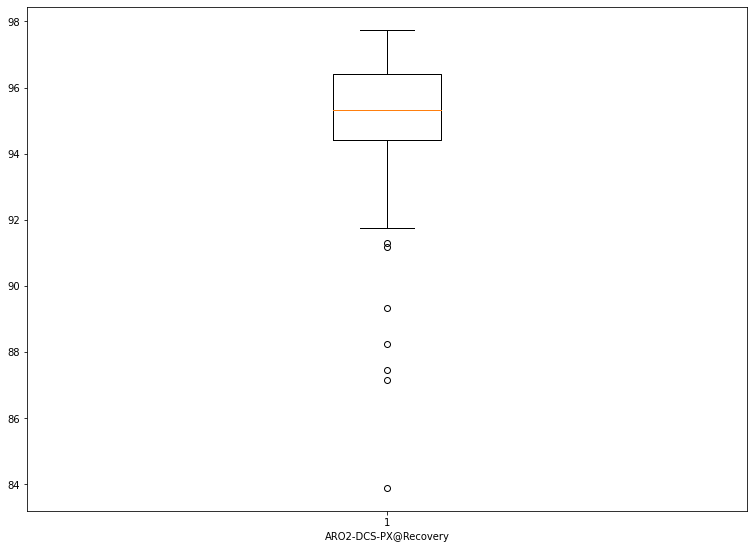

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('ARO2-DCS-PX@Recovery')
bp = ax.boxplot(df_2['ARO2-DCS-PX@Recovery'].dropna().values)

plt.show()

# plt.show()

In [16]:
# remove outliner
import numpy as np
for j in col:
  mean = df_2[j].mean()
  std = df_2[j].std()
  outliner = []
  for i in range(len(df_2[j])):
    if (df_2.loc[i,j] > (mean - std*3) and df_2.loc[i,j] < (mean + std*3)):
      pass
    else:
      outliner = outliner + [i]
  print(j , mean, std, (mean - std*3), (mean + std*3))
  df_2.loc[outliner, j] = np.nan

ARO2-DCS-FI914B2 1581.5814651323533 448.28333074207524 236.73147290612746 2926.431457358579
ARO2-DCS-FI914B3 1651.4292906347355 383.0750220210916 502.2042245714606 2800.6543566980104
ARO2-DCS-FI91601 526.5680582453402 118.55080708016793 170.91563700483647 882.220479485844
ARO2-DCS-FI91701 588.4468408959727 131.1448490143912 195.01229385279908 981.8813879391464
ARO2-DCS-RV_CYC_T 31.67889993840027 3.344096004346309 21.64661192536134 41.7111879514392
ARO2-DCS-RV_STEP_T 79.10034186073986 7.82522887501149 55.62465523570539 102.57602848577433
ARO2-LIMS-S708@Br.Index 7.517148973168258 4.794674830961282 -6.866875519715588 21.901173466052104
ARO2-LIMS-S708@A9 0.005710443353356035 0.002664085698143733 -0.0022818137410751628 0.013702700447787233
ARO2-LIMS-S708@A10+ 0.00013974127000502585 0.0012756027728184091 -0.003687067048450202 0.003966549588460253
ARO2-LIMS-S708@Water 67.88512146289914 1145.4526752171173 -3368.472904188453 3504.243147114251
ARO2-LIMS-S708@Sulfur 0.06587246820869991 0.05201928

In [17]:
df_3 = df_2[x_col].dropna(axis="index").join(df_2.loc[df_2[x_col].dropna(axis="index").index.tolist(), y_col])
df_3

ARO2-DCS-FI914B2  ...  ARO2-DCS-PX@Recovery
2785        1829.897095  ...                 96.48
2809        2073.912598  ...                 96.73
2833        2061.358887  ...                 96.72
2857        1442.444946  ...                 96.67
2881        1439.456665  ...                 96.64
...                 ...  ...                   ...
38377       1465.302124  ...                 93.49
38401       1867.958496  ...                 93.73
38425       2073.356445  ...                 93.47
38449       1421.044678  ...                 93.59
38473       1461.065186  ...                 93.67

[998 rows x 19 columns]

In [20]:
df_3[col].describe()

ARO2-DCS-FI914B2  ...  ARO2-DCS-PX@Recovery
count        998.000000  ...            945.000000
mean        1670.408298  ...             94.768201
std          311.464987  ...              1.012470
min          938.150146  ...             91.740000
25%         1444.661560  ...             94.010000
50%         1683.942688  ...             94.880000
75%         2049.892883  ...             95.460000
max         2098.503662  ...             97.400000

[8 rows x 19 columns]

In [21]:
df_3_describe = df_3[col].describe()
df_3_describe.iloc[:,11:16]

ARO2-DCS-PDI91101  ...  ARO2-LIMS-s922@MX
count         998.000000  ...         988.000000
mean            3.475470  ...        1485.888664
std             0.266697  ...          78.818053
min             2.303926  ...        1232.000000
25%             3.274334  ...        1441.000000
50%             3.485117  ...        1499.000000
75%             3.722807  ...        1540.000000
max             4.050861  ...        1643.000000

[8 rows x 5 columns]

<font size = 5>Analysis</font>
*   ARO2-LIMS-S708@PX
*   ARO2-LIMS-s922@PX
*   ARO2-LIMS-s922@MX


corr

In [24]:
df_3_corr = df_3[col].corr()[y_col]
df_3_corr.iloc[:,:5]

ARO2-DCS-PDI91101  ...  ARO2-LIMS-s922@MX
ARO2-DCS-FI914B2                  0.028592  ...           0.018327
ARO2-DCS-FI914B3                 -0.044648  ...          -0.021855
ARO2-DCS-FI91601                  0.502469  ...          -0.217933
ARO2-DCS-FI91701                  0.553046  ...           0.126164
ARO2-DCS-RV_CYC_T                -0.564246  ...          -0.029838
ARO2-DCS-RV_STEP_T               -0.564172  ...          -0.029662
ARO2-LIMS-S708@Br.Index           0.073649  ...           0.075868
ARO2-LIMS-S708@A9                 0.143700  ...          -0.253175
ARO2-LIMS-S708@A10+               0.004707  ...          -0.081779
ARO2-LIMS-S708@Water             -0.006861  ...          -0.403901
ARO2-LIMS-S708@Sulfur             0.019615  ...          -0.233220
ARO2-DCS-PDI91101                 1.000000  ...          -0.049396
ARO2-DCS-PDI91201                -0.357444  ...           0.019793
ARO2-LIMS-S708@PX                 0.134178  ...           0.408348
ARO2-LIMS-s922@PX                -0.036107  ...          -0.358561
ARO2-LIMS-s922@MX                -0.049396  ...           1.000000
ARO2-LIMS-S907@PX                -0.050681  ...          -0.007050
ARO2-LIMS-S905@PX                 0.045855  ...           0.171312
ARO2-DCS-PX@Recovery             -0.047900  ...          -0.629227

[19 rows x 5 columns]

xgboost

['ARO2-DCS-RV_CYC_T', 'ARO2-DCS-RV_STEP_T', 'ARO2-DCS-FI91701', 'ARO2-DCS-FI91601', 'ARO2-LIMS-S708@A9', 'ARO2-LIMS-S708@Br.Index', 'ARO2-DCS-FI914B3', 'ARO2-DCS-FI914B2', 'ARO2-LIMS-S708@Sulfur', 'ARO2-LIMS-S708@Water', 'ARO2-LIMS-S708@A10+'] : ARO2-DCS-PDI91101
[01:25:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-DCS-PDI91101 驗證分數:'

0.63392008361192

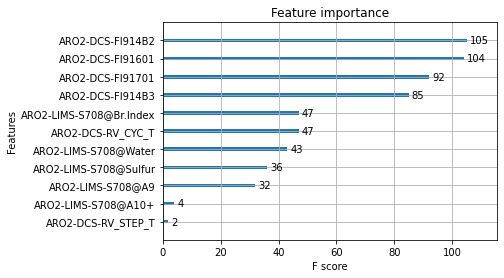

['ARO2-DCS-RV_STEP_T', 'ARO2-DCS-RV_CYC_T', 'ARO2-DCS-FI91601', 'ARO2-DCS-FI91701', 'ARO2-DCS-FI914B3', 'ARO2-LIMS-S708@Br.Index', 'ARO2-LIMS-S708@Water', 'ARO2-LIMS-S708@A9', 'ARO2-DCS-FI914B2', 'ARO2-LIMS-S708@A10+', 'ARO2-LIMS-S708@Sulfur'] : ARO2-DCS-PDI91201
[01:25:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-DCS-PDI91201 驗證分數:'

0.6265494109908938

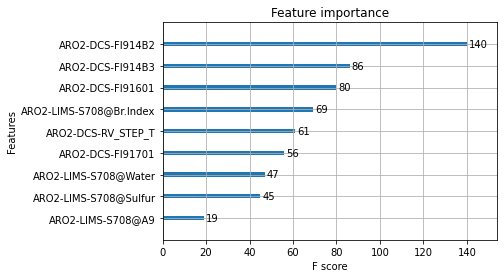

['ARO2-LIMS-S708@Water', 'ARO2-DCS-FI91701', 'ARO2-LIMS-S708@A9', 'ARO2-DCS-RV_CYC_T', 'ARO2-DCS-RV_STEP_T', 'ARO2-LIMS-S708@Br.Index', 'ARO2-LIMS-S708@Sulfur', 'ARO2-LIMS-S708@A10+', 'ARO2-DCS-FI914B3', 'ARO2-DCS-FI91601', 'ARO2-DCS-FI914B2'] : ARO2-LIMS-S708@PX
[01:25:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-LIMS-S708@PX 驗證分數:'

0.5612244848951344

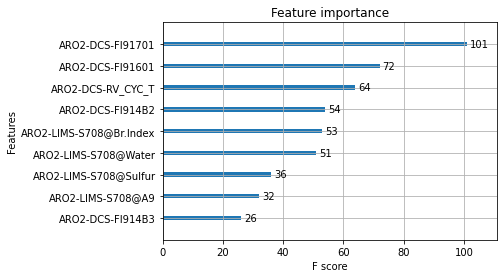

['ARO2-LIMS-S708@Sulfur', 'ARO2-DCS-FI91701', 'ARO2-DCS-RV_CYC_T', 'ARO2-DCS-RV_STEP_T', 'ARO2-DCS-FI91601', 'ARO2-DCS-FI914B3', 'ARO2-LIMS-S708@Water', 'ARO2-LIMS-S708@A10+', 'ARO2-LIMS-S708@A9', 'ARO2-LIMS-S708@Br.Index', 'ARO2-DCS-FI914B2'] : ARO2-LIMS-s922@PX
[01:25:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-LIMS-s922@PX 驗證分數:'

0.20570435047477564

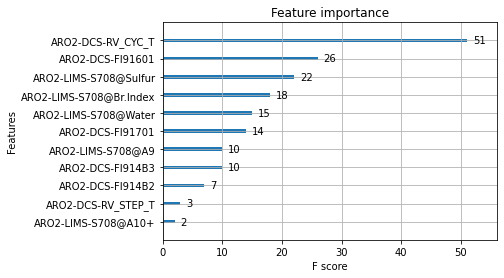

['ARO2-LIMS-S708@Water', 'ARO2-LIMS-S708@A9', 'ARO2-LIMS-S708@Sulfur', 'ARO2-DCS-FI91601', 'ARO2-DCS-FI91701', 'ARO2-LIMS-S708@A10+', 'ARO2-LIMS-S708@Br.Index', 'ARO2-DCS-RV_CYC_T', 'ARO2-DCS-RV_STEP_T', 'ARO2-DCS-FI914B3', 'ARO2-DCS-FI914B2'] : ARO2-LIMS-s922@MX
[01:25:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-LIMS-s922@MX 驗證分數:'

0.683811677161007

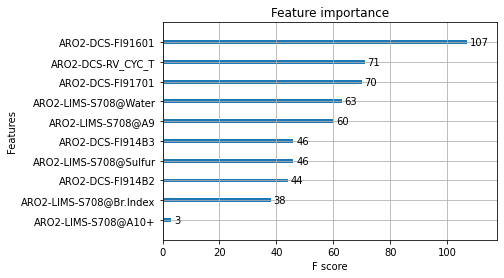

In [32]:
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sb

for i in y_col[:5]:
  y_label = i
  features = df_3_corr.abs().loc[x_col, y_label].sort_values(ascending=False).index.tolist()
  print(features,':',y_label)
  # for i in df_mean[x_col].columns:
  #   df_mean[i] = pd.to_numeric(df_mean[i],errors='coerce') 
  df_3_xgbr = df_3[features+[y_label]].dropna(axis=0)


  X = df_3_xgbr[features]
  y = df_3_xgbr[y_label]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = XGBRegressor()
  model.fit(X_train,y_train)
  display(f'{y_label} 驗證分數:',model.score(X_test,y_test))
  plot_importance(model)
  plt.show()

<font size = 5>Analysis</font>
*   ARO2-LIMS-S907@PX
*   ARO2-LIMS-S905@PX
*   ARO2-DCS-PX@Recovery

corr

In [28]:
df_3_1_24_corr = df_3[col].corr()[y_col]
df_3_1_24_corr.iloc[:,5:]

ARO2-LIMS-S907@PX  ...  ARO2-DCS-PX@Recovery
ARO2-DCS-FI914B2                 -0.004188  ...              0.003650
ARO2-DCS-FI914B3                 -0.022578  ...              0.069796
ARO2-DCS-FI91601                  0.037392  ...              0.519340
ARO2-DCS-FI91701                  0.020657  ...             -0.221946
ARO2-DCS-RV_CYC_T                -0.029163  ...              0.005819
ARO2-DCS-RV_STEP_T               -0.029092  ...              0.005372
ARO2-LIMS-S708@Br.Index           0.009191  ...             -0.159405
ARO2-LIMS-S708@A9                -0.036387  ...              0.071816
ARO2-LIMS-S708@A10+              -0.049225  ...              0.060790
ARO2-LIMS-S708@Water             -0.010331  ...              0.344503
ARO2-LIMS-S708@Sulfur             0.059376  ...              0.312212
ARO2-DCS-PDI91101                -0.050681  ...             -0.047900
ARO2-DCS-PDI91201                 0.043217  ...              0.099690
ARO2-LIMS-S708@PX                 0.049993  ...             -0.580321
ARO2-LIMS-s922@PX                 0.057682  ...             -0.098211
ARO2-LIMS-s922@MX                -0.007050  ...             -0.629227
ARO2-LIMS-S907@PX                 1.000000  ...              0.076274
ARO2-LIMS-S905@PX                -0.011314  ...             -0.275186
ARO2-DCS-PX@Recovery              0.076274  ...              1.000000

[19 rows x 3 columns]

In [29]:
df_3_1_24_describe = df_3[col].describe()
df_3_1_24_describe.iloc[:,16:]

ARO2-LIMS-S907@PX  ARO2-LIMS-S905@PX  ARO2-DCS-PX@Recovery
count         953.000000         986.000000            945.000000
mean           35.512748           0.740529             94.768201
std             4.835720           0.501103              1.012470
min            15.683000           0.090000             91.740000
25%            33.582001           0.328250             94.010000
50%            35.480000           0.700000             94.880000
75%            38.009998           0.984500             95.460000
max            46.195999           5.365000             97.400000

['ARO2-LIMS-S708@Sulfur', 'ARO2-LIMS-S708@A10+', 'ARO2-DCS-FI91601', 'ARO2-LIMS-S708@A9', 'ARO2-DCS-RV_CYC_T', 'ARO2-DCS-RV_STEP_T', 'ARO2-DCS-FI914B3', 'ARO2-DCS-FI91701', 'ARO2-LIMS-S708@Water', 'ARO2-LIMS-S708@Br.Index', 'ARO2-DCS-FI914B2'] : ARO2-LIMS-S907@PX
[01:19:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-LIMS-S907@PX 驗證分數:'

-0.16938270223501672

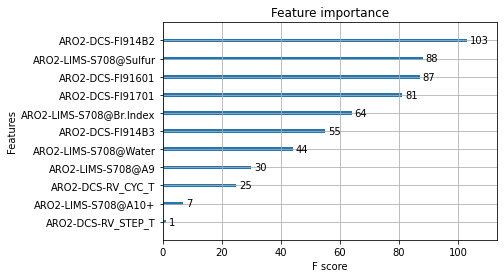

['ARO2-LIMS-S708@Water', 'ARO2-LIMS-S708@Sulfur', 'ARO2-LIMS-S708@Br.Index', 'ARO2-DCS-FI91601', 'ARO2-LIMS-S708@A9', 'ARO2-DCS-FI914B3', 'ARO2-DCS-FI91701', 'ARO2-DCS-FI914B2', 'ARO2-LIMS-S708@A10+', 'ARO2-DCS-RV_CYC_T', 'ARO2-DCS-RV_STEP_T'] : ARO2-LIMS-S905@PX
[01:19:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-LIMS-S905@PX 驗證分數:'

-0.0879415079698378

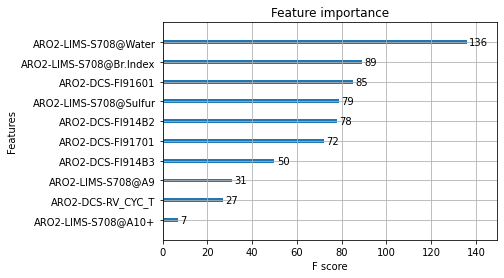

['ARO2-DCS-FI91601', 'ARO2-LIMS-S708@Water', 'ARO2-LIMS-S708@Sulfur', 'ARO2-DCS-FI91701', 'ARO2-LIMS-S708@Br.Index', 'ARO2-LIMS-S708@A9', 'ARO2-DCS-FI914B3', 'ARO2-LIMS-S708@A10+', 'ARO2-DCS-RV_CYC_T', 'ARO2-DCS-RV_STEP_T', 'ARO2-DCS-FI914B2'] : ARO2-DCS-PX@Recovery
[01:19:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-DCS-PX@Recovery 驗證分數:'

0.6849548861928599

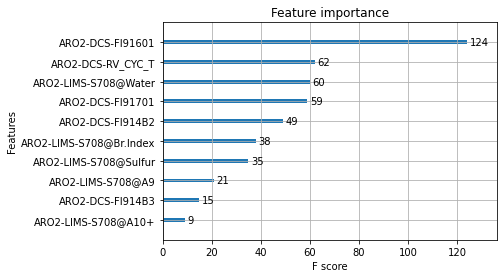

In [30]:
for i in y_col[5:]:
  y_label = i
  features = df_3_1_24_corr.abs().loc[x_col, y_label].sort_values(ascending=False).index.tolist()
  print(features,':',y_label)
  # for i in df_mean[x_col].columns:
  #   df_mean[i] = pd.to_numeric(df_mean[i],errors='coerce') 
  df_3_1_24_xgbr = df_3[features+[y_label]].dropna(axis=0)


  X = df_3_1_24_xgbr[features]
  y = df_3_1_24_xgbr[y_label]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = XGBRegressor()
  model.fit(X_train,y_train)
  display(f'{y_label} 驗證分數:',model.score(X_test,y_test))
  plot_importance(model)
  plt.show()